In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import glob

In [2]:
luna = "../../luna16/LUNA16/"
mask_v1 = "../../luna16/mask/"
mask_v2 = "../.preprocess/"


uid_test = "1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886"
luna_paths = glob.glob(f"{luna}subset*/*.mhd")

In [3]:
uid_test = "1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886"


luna_path = glob.glob(f"{luna}/subset*/{uid_test}*.mhd")[0]
mask_path = glob.glob(f"{mask_v1}/subset*/{uid_test}*.mhd")[0]
mask_path_v2 = glob.glob(f"../../preprocess/subset1-gt/{uid_test}_gt*")[0]
index_mask_v2 = glob.glob(f"../../preprocess/subset1-gt/{uid_test}_posindex*")[0]
print(luna_path)
print(mask_path)
print(mask_path_v2)

../../luna16/LUNA16\subset1\1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886.mhd
../../luna16/mask\subset1\1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886_segmentation.mhd
../../preprocess/subset1-gt\1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886_gt.npy


In [4]:
def read_sitk(path):
    ct_mhd = sitk.ReadImage(path)
    ct_a = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

    return ct_a

ct_luna = read_sitk(luna_path)
ct_mask = read_sitk(mask_path)
ct_mask_v2 = np.load(mask_path_v2)

In [5]:
from util import plot_ct

index = list(range(82, 99))

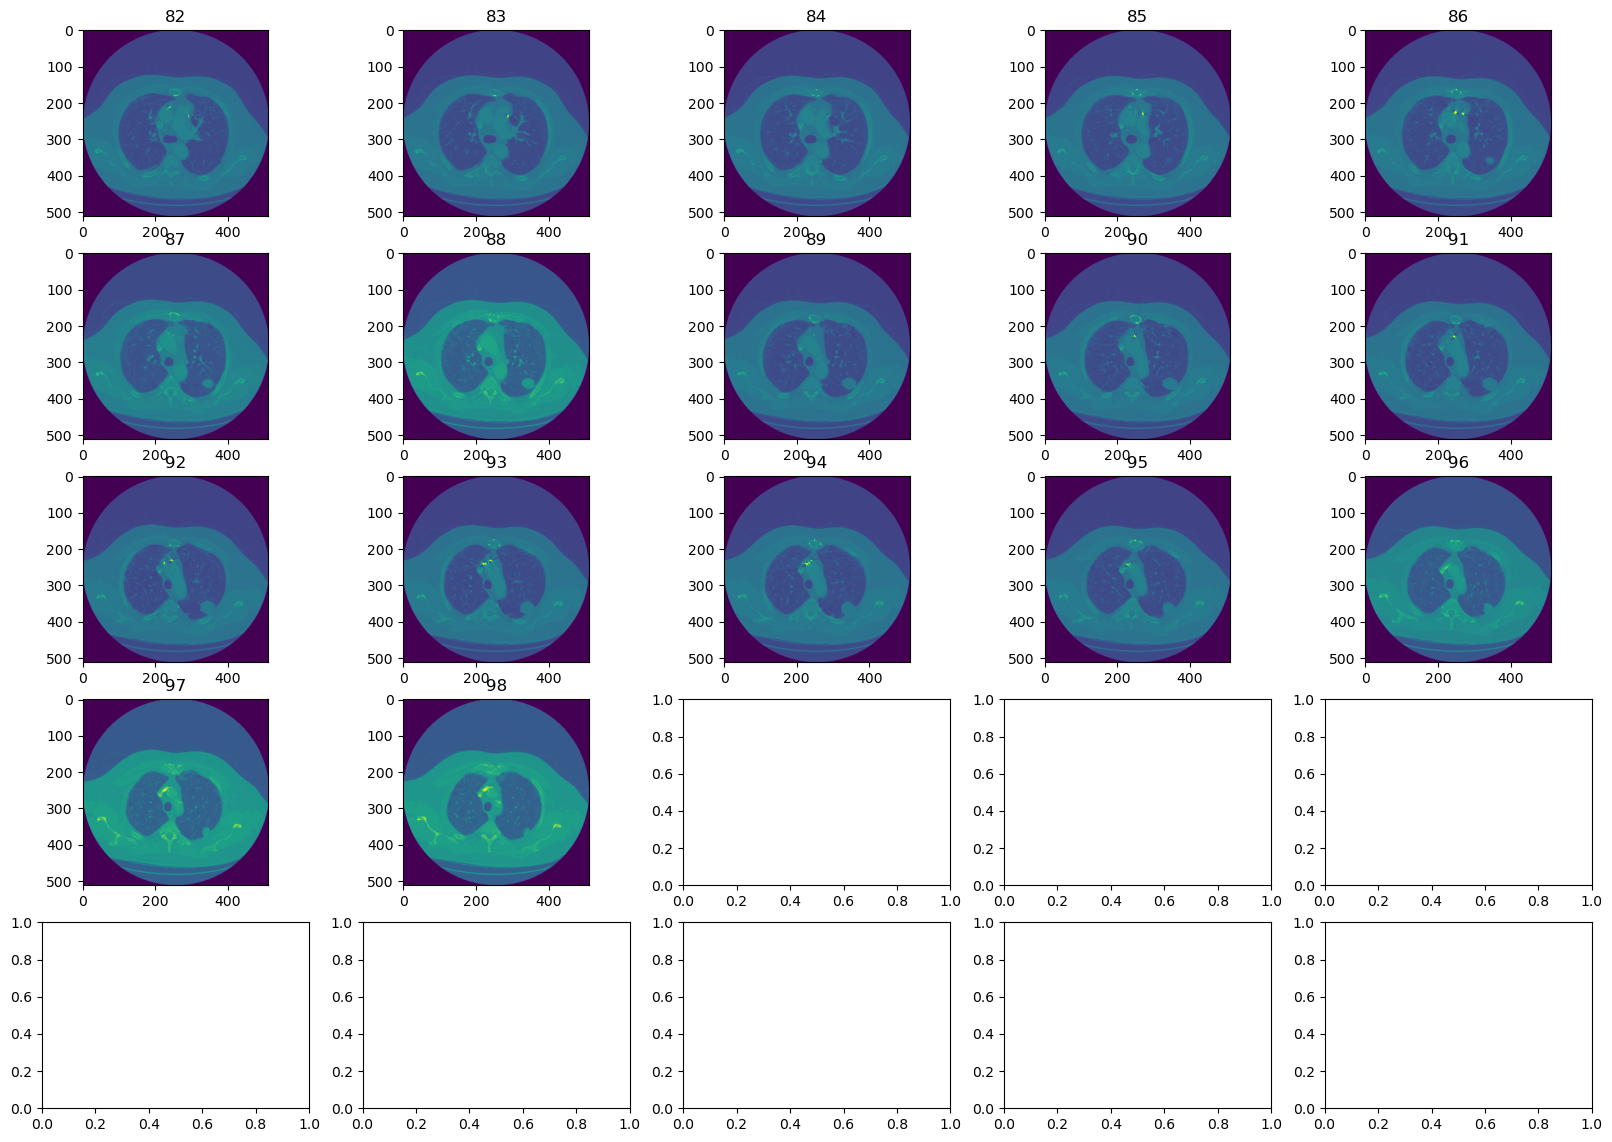

In [6]:
# lunaplot
plot_ct(ct_luna, index)

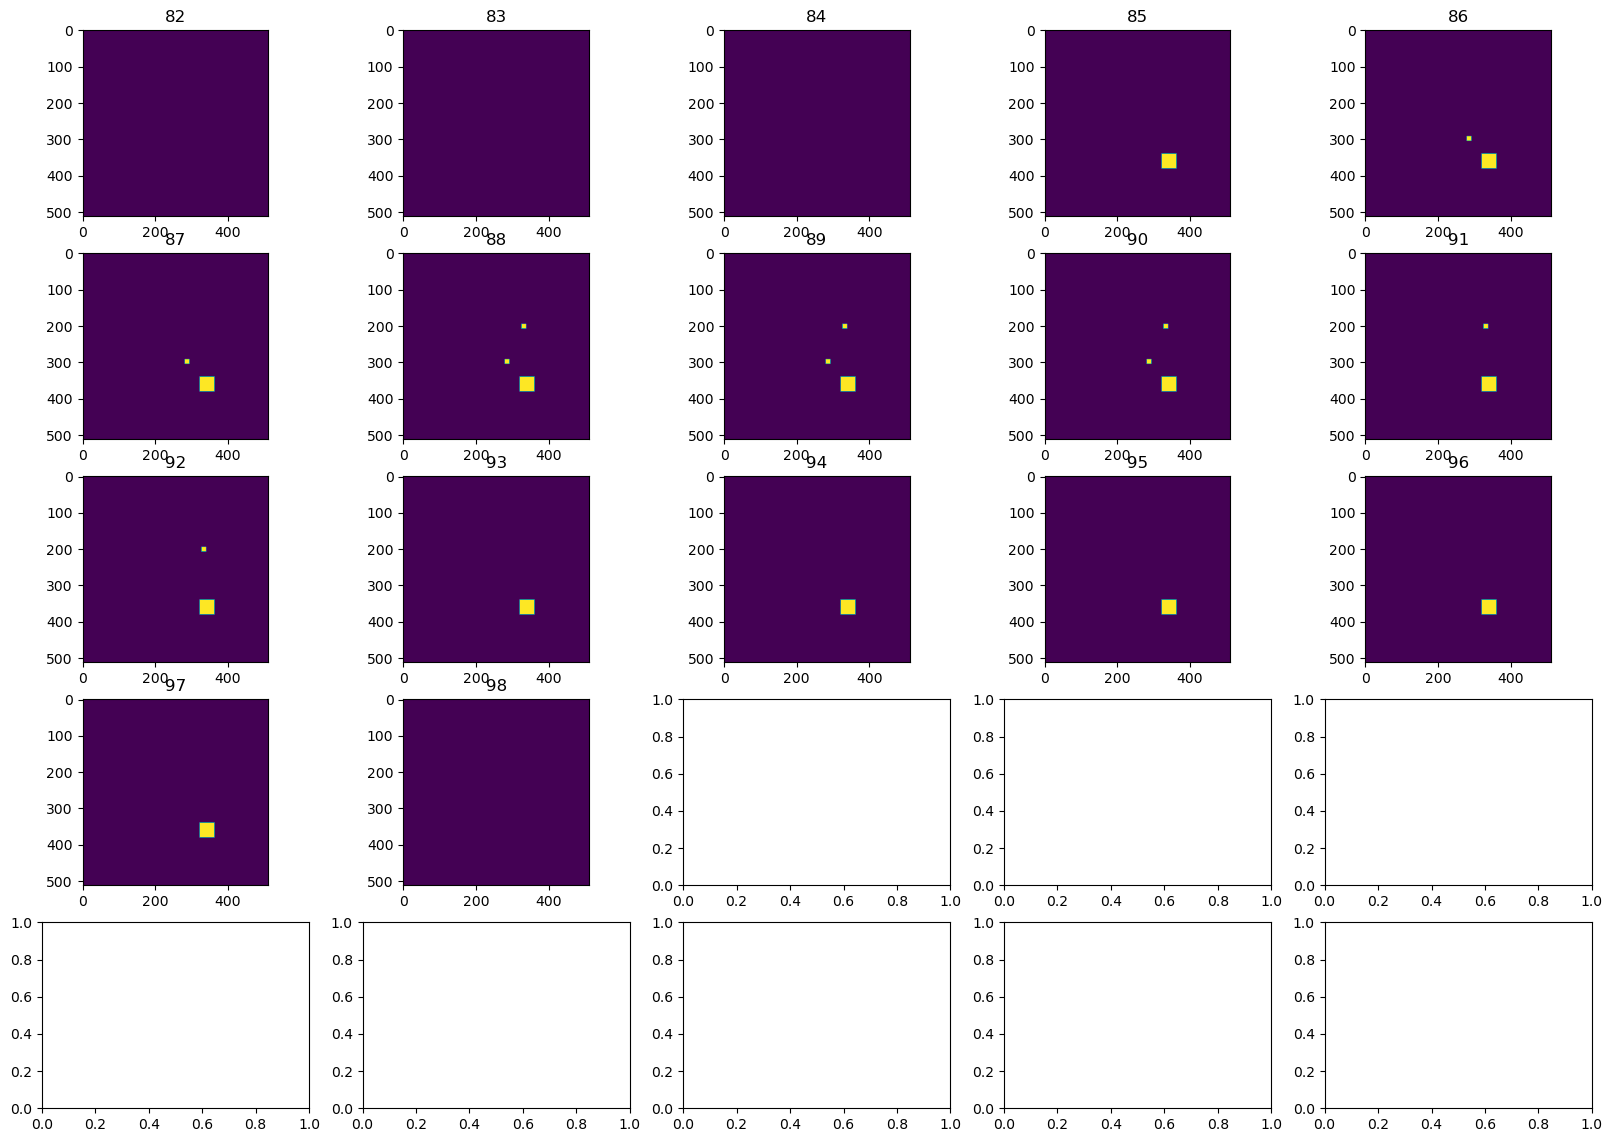

In [7]:
plot_ct(ct_mask, index)

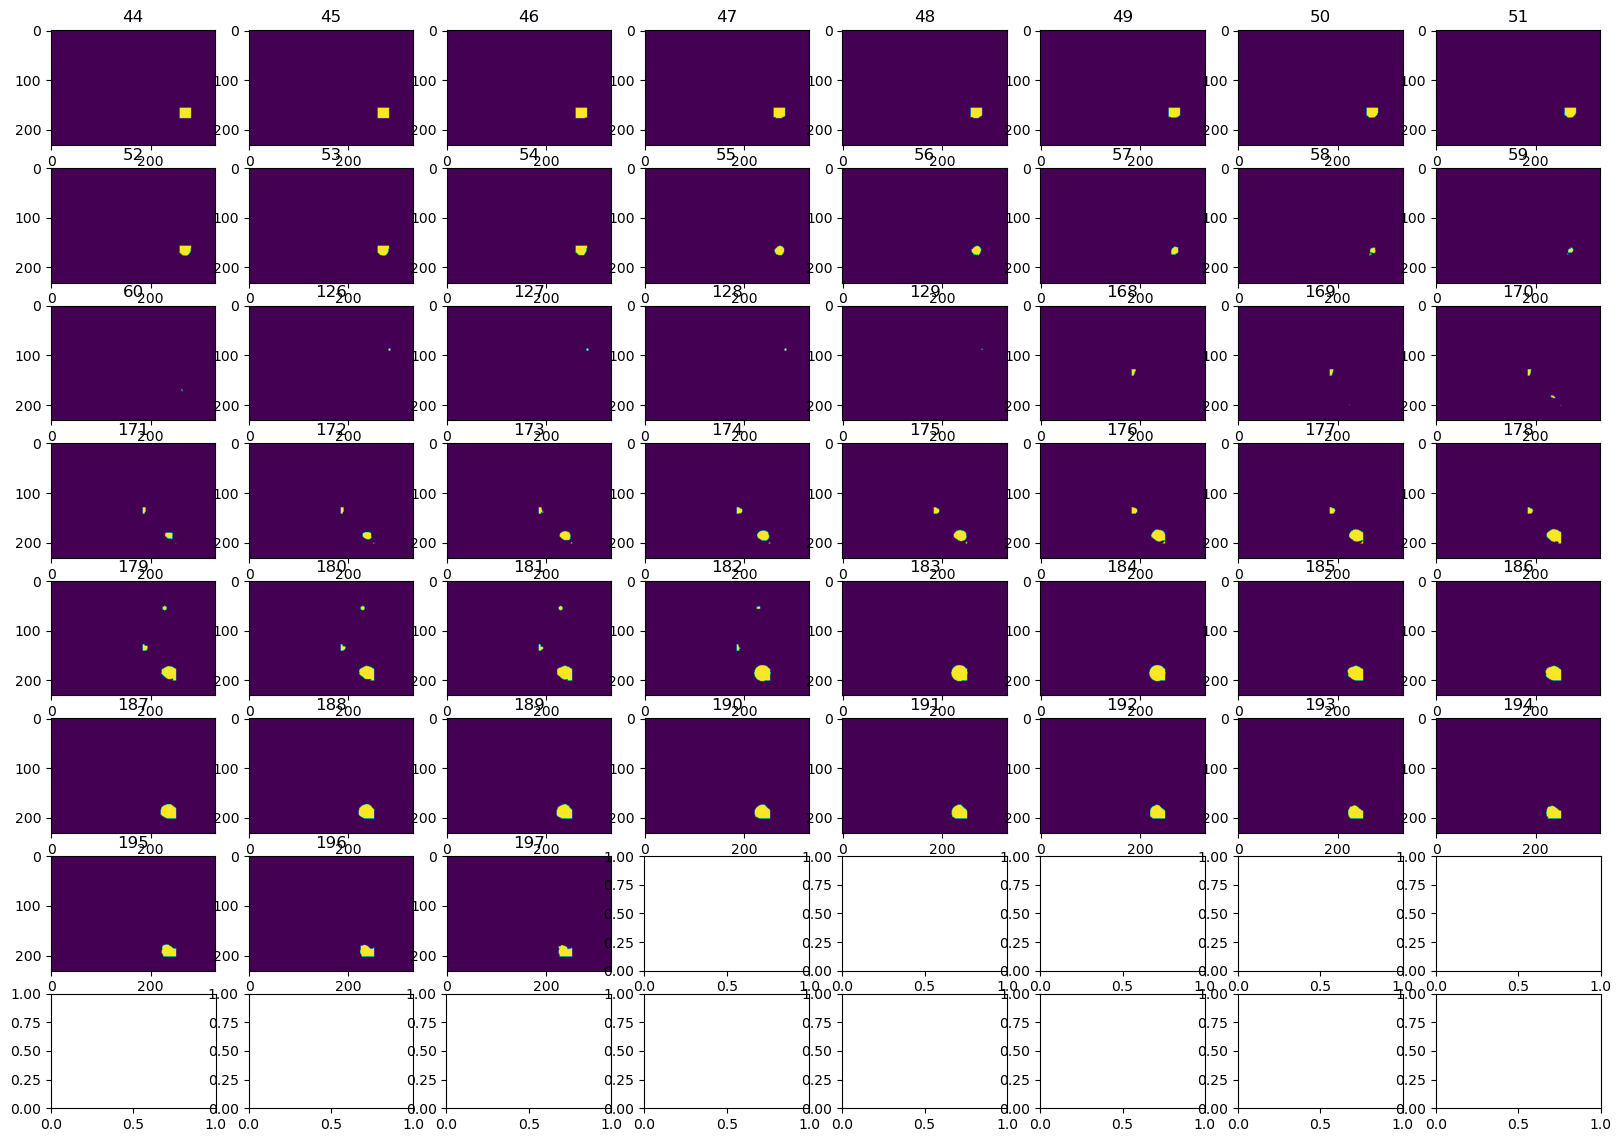

In [8]:
mask_index = np.load(index_mask_v2)
plot_ct(ct_mask_v2[0], mask_index)

In [9]:
print(ct_luna.shape)
print(ct_mask.shape)
print(ct_mask_v2.shape)

(123, 512, 512)
(123, 512, 512)
(1, 252, 231, 331)


## Tính độ HU trong phổi


In [10]:
import numpy as np
import pandas as pd
import SimpleITK as sitk 
import glob
from tqdm import tqdm

In [11]:
config_paths = {
    "luna16":"../../luna16/LUNA16/",
    "segment":"../../luna16/seg-lungs-LUNA16/",
    "annotations":"../../luna16/annotations.csv",
    "candidates":"../../luna16/candidates.csv",
    "slide_v1":"../center-coord-chunk",
    "slide_v2":"../center-coord-chunk-v2",
}

In [12]:
def read_sitk(path):
    ct_mhd = sitk.ReadImage(path)
    ct_a = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

    return ct_a

In [13]:
with open("key.txt", 'r') as f:
    keys = f.readlines()[0][11:-2].split(',')

dic = {}
for key in keys:
    dic[float(key)] = 0

In [14]:
paths = glob.glob(config_paths['segment'] + "*.mhd")

# dic = {}

for path in tqdm(paths):
    uid = path.split("\\")[-1][:-4]
    # print(uid)
    luna_path = glob.glob(config_paths["luna16"] + f"subset*/{uid}*.mhd")[0]

    luna_image = read_sitk(luna_path)
    mask_image = read_sitk(path)

    # print(luna_image.shape)
    # print(mask_image.shape)

    pulmonary_left = mask_image == 3
    pulmonary_right = mask_image == 4

    pulmonary = pulmonary_left | pulmonary_right

    value_HU = luna_image[pulmonary]

    for key in dic.keys():
        num_of_key = np.count_nonzero(value_HU == key)
        dic[key] += num_of_key



In [18]:
with open("hu_pulmonary.txt", 'r') as f:
    f.write(str(dic))

['{-1024.0: 0, -1023.0: 0, -1022.0: 0, -1021.0: 0, -1020.0: 0, -1019.0: 0, -1018.0: 0, -1017.0: 0, -1016.0: 0, -1015.0: 0, -1014.0: 0, -1013.0: 0, -1012.0: 0, -1011.0: 0, -1010.0: 0, -1009.0: 0, -1008.0: 0, -1007.0: 0, -1006.0: 0, -1005.0: 0, -1004.0: 0, -1003.0: 0, -1002.0: 0, -1001.0: 0, -1000.0: 0, -999.0: 0, -998.0: 0, -997.0: 0, -996.0: 0, -995.0: 0, -994.0: 0, -993.0: 0, -992.0: 0, -991.0: 0, -990.0: 0, -989.0: 0, -988.0: 0, -987.0: 0, -986.0: 0, -985.0: 0, -984.0: 0, -983.0: 0, -982.0: 0, -981.0: 0, -980.0: 0, -979.0: 0, -978.0: 0, -977.0: 0, -976.0: 0, -975.0: 0, -974.0: 0, -973.0: 0, -972.0: 0, -971.0: 0, -970.0: 0, -969.0: 0, -968.0: 0, -967.0: 0, -966.0: 0, -965.0: 0, -964.0: 0, -963.0: 0, -962.0: 0, -961.0: 0, -960.0: 0, -959.0: 0, -958.0: 0, -957.0: 0, -956.0: 0, -955.0: 0, -954.0: 0, -953.0: 0, -952.0: 0, -951.0: 0, -950.0: 0, -949.0: 0, -948.0: 0, -947.0: 0, -946.0: 0, -945.0: 0, -944.0: 0, -943.0: 0, -942.0: 0, -941.0: 0, -940.0: 0, -939.0: 0, -938.0: 0, -937.0: 0, -936